# Analysis of the rankings obtained in the tags_ask_ubuntu hypergraph

In [37]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from collections import defaultdict

In [38]:
df = pandas.read_csv("Output/tags_ask_ubuntu_dataframe.csv")

In [22]:
df

,UPHEC-2,UPHEC-3,UPHEC-4,UPHEC-5,HEC-2unif,HEC-3unif,HEC-4unif,HEC-5unif
0,0.000830,0.000697,0.000584,0.000532,0.001732,0.001297,0.001102,0.001049
1,0.001423,0.001032,0.000816,0.000683,0.001214,0.000900,0.000622,0.000604
2,0.002054,0.001282,0.000963,0.000793,0.002811,0.001778,0.001147,0.000838
3,0.000357,0.000391,0.000405,0.000379,0.004494,0.002335,0.001402,0.001039
4,0.002115,0.001289,0.001037,0.000936,0.000262,0.000387,0.000422,0.000357
...,...,...,...,...,...,...,...,...
3016,0.000025,0.000040,0.000105,0.000132,0.000012,0.000061,0.000000,0.000000
3017,0.000028,0.000081,0.000109,0.000122,0.000000,0.000000,0.000073,0.000000
3018,0.000023,0.000040,0.000110,0.000130,0.000000,0.000030,0.000000,0.000000
3019,0.000031,0.000084,0.000112,0.000128,0.000000,0.000000,0.000074,0.000000


In [23]:
df.sum() # consistency check

UPHEC-2      1.0
UPHEC-3      1.0
UPHEC-4      1.0
UPHEC-5      1.0
HEC-2unif    1.0
HEC-3unif    1.0
HEC-4unif    1.0
HEC-5unif    1.0
dtype: float64

## Complete ranking

In [24]:
KT = np.zeros((len(df.columns),len(df.columns)))
for i, row in enumerate(df):
    for j, col in enumerate(df):
        KT[i,j] = scipy.stats.kendalltau(df[row],df[col]).statistic

In [25]:
np.min(KT)

0.20040016808824843

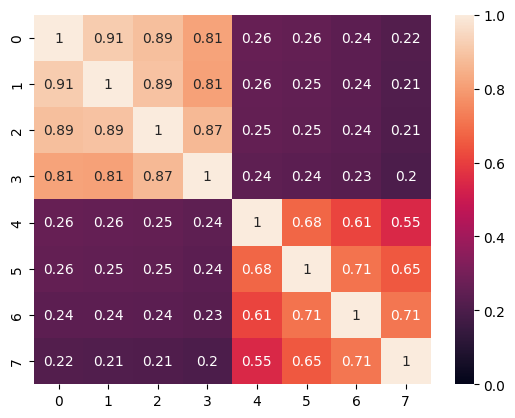

In [26]:
ax = sns.heatmap(KT, annot=True, vmin=0, vmax=1)

## Top-K ranking


In [28]:
## Top K nodes based on a centrality dictionary ##
def topK(cent, K=None, return_list=False):
    """
    Given a dictionary node-centrality score, return the top K ranking
    """

    if not K:
        K = len(cent)
    
    C = sorted(cent, key=cent.get, reverse=True)[:K]
    ranking = {key: cent[key] for key in C}
    
    if return_list:
        return C

    return ranking

In [31]:
dictlist = df.to_dict()

In [71]:
for key1, value1 in dictlist.items():
    print(key1, topK(value1,K=10).keys())

UPHEC-2 dict_keys([1728, 1162, 1737, 87, 158, 51, 7, 120, 151, 287])
UPHEC-3 dict_keys([3020, 1728, 1162, 1737, 87, 51, 158, 7, 287, 120])
UPHEC-4 dict_keys([3020, 1728, 1162, 87, 1737, 158, 120, 151, 7, 51])
UPHEC-5 dict_keys([1728, 87, 151, 120, 1162, 1737, 136, 158, 153, 135])
HEC-2unif dict_keys([1729, 1163, 1738, 52, 822, 3, 280, 8, 288, 1918])
HEC-3unif dict_keys([1729, 1163, 88, 1738, 52, 8, 288, 159, 280, 6])
HEC-4unif dict_keys([88, 1729, 1163, 152, 121, 137, 1738, 159, 136, 314])
HEC-5unif dict_keys([88, 152, 137, 121, 1729, 136, 154, 1738, 1163, 159])


In [47]:
KTtopK = defaultdict(list)

for key1, value1 in dictlist.items():
    
    for key2, value2 in dictlist.items():
        
        print(key1, key2)
        
        if key1 == key2:
            continue
        
        for k in range(1, len(df)):
                        
            topk1 = topK(value1, K=k)
            centrals2 = [value2[node] for node in topk1.keys()]
            
            KTtopK[key1 + " -> " + key2].append( scipy.stats.kendalltau(list(topk1.values()), centrals2).statistic )

UPHEC-2 UPHEC-2
UPHEC-2 UPHEC-3
UPHEC-2 UPHEC-4
UPHEC-2 UPHEC-5
UPHEC-2 HEC-2unif
UPHEC-2 HEC-3unif
UPHEC-2 HEC-4unif
UPHEC-2 HEC-5unif
UPHEC-3 UPHEC-2
UPHEC-3 UPHEC-3
UPHEC-3 UPHEC-4
UPHEC-3 UPHEC-5
UPHEC-3 HEC-2unif
UPHEC-3 HEC-3unif
UPHEC-3 HEC-4unif
UPHEC-3 HEC-5unif
UPHEC-4 UPHEC-2
UPHEC-4 UPHEC-3
UPHEC-4 UPHEC-4
UPHEC-4 UPHEC-5
UPHEC-4 HEC-2unif
UPHEC-4 HEC-3unif
UPHEC-4 HEC-4unif
UPHEC-4 HEC-5unif
UPHEC-5 UPHEC-2
UPHEC-5 UPHEC-3
UPHEC-5 UPHEC-4
UPHEC-5 UPHEC-5
UPHEC-5 HEC-2unif
UPHEC-5 HEC-3unif
UPHEC-5 HEC-4unif
UPHEC-5 HEC-5unif
HEC-2unif UPHEC-2
HEC-2unif UPHEC-3
HEC-2unif UPHEC-4
HEC-2unif UPHEC-5
HEC-2unif HEC-2unif
HEC-2unif HEC-3unif
HEC-2unif HEC-4unif
HEC-2unif HEC-5unif
HEC-3unif UPHEC-2
HEC-3unif UPHEC-3
HEC-3unif UPHEC-4
HEC-3unif UPHEC-5
HEC-3unif HEC-2unif
HEC-3unif HEC-3unif
HEC-3unif HEC-4unif
HEC-3unif HEC-5unif
HEC-4unif UPHEC-2
HEC-4unif UPHEC-3
HEC-4unif UPHEC-4
HEC-4unif UPHEC-5
HEC-4unif HEC-2unif
HEC-4unif HEC-3unif
HEC-4unif HEC-4unif
HEC-4unif HEC-5unif


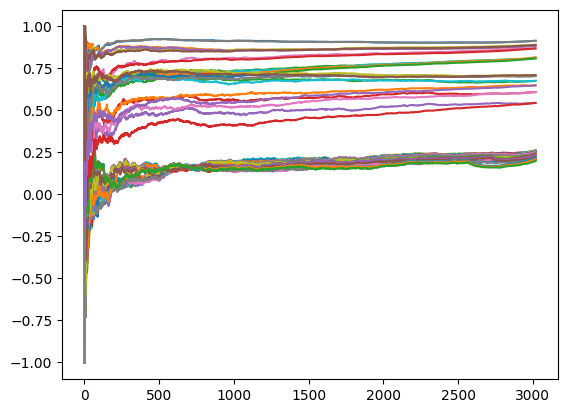

In [49]:
for key, val in KTtopK.items():
    ax.plot(val, label=key)

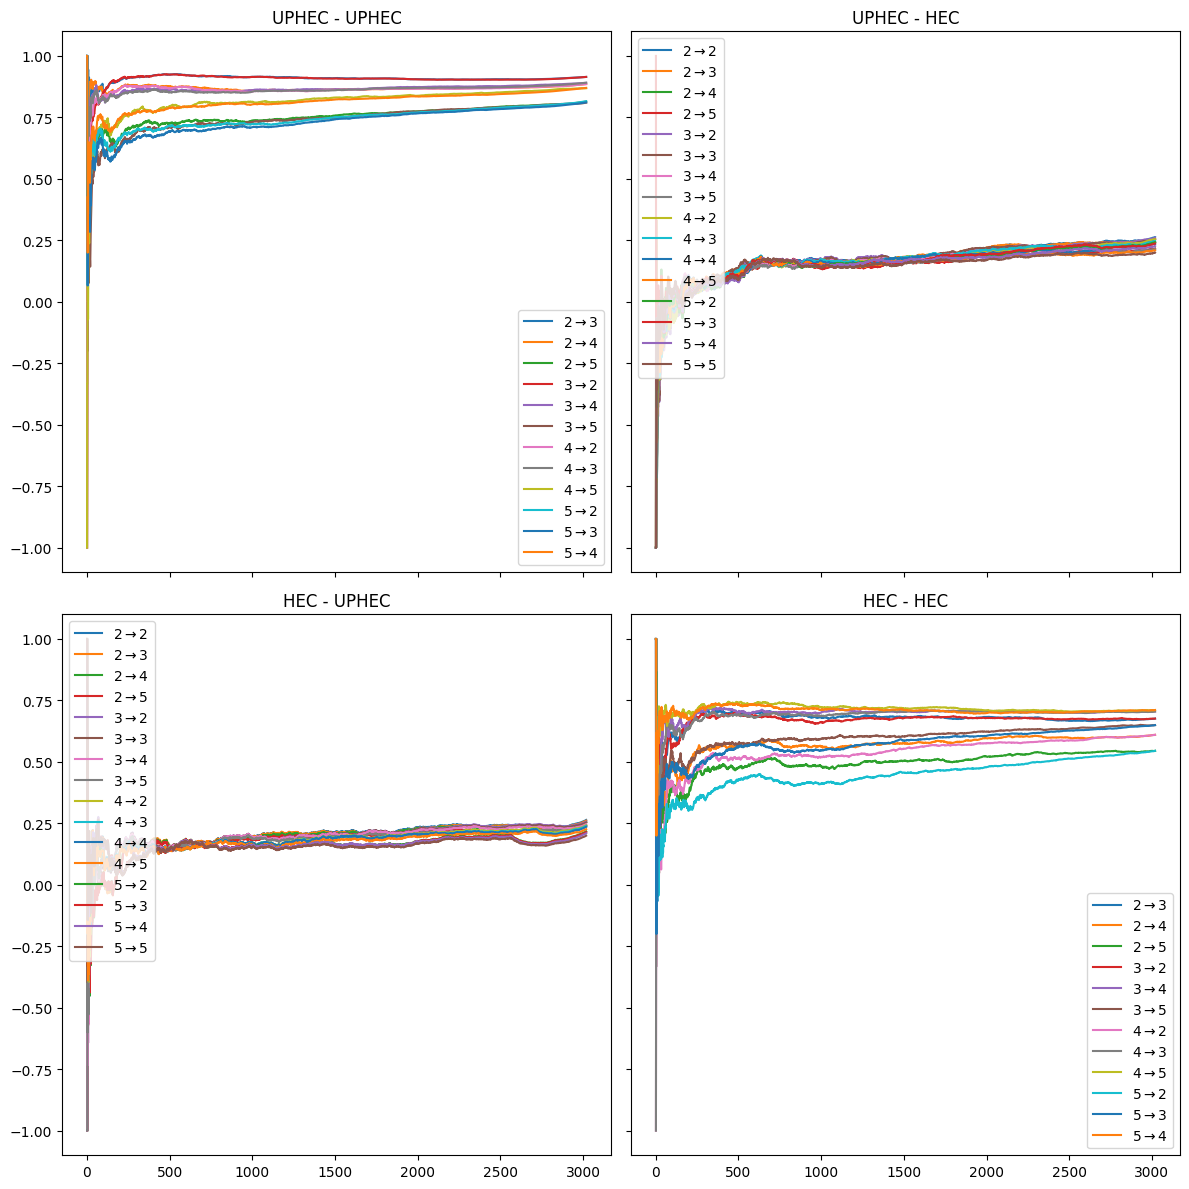

In [69]:
fig, ax = plt.subplots(2,2, figsize=(12,12), sharex=True, sharey=True)

for key, val in KTtopK.items():
    if "UP" in key[0:3] and "UP" in key[-8:]:
        ax[0,0].plot(val, label=f"{key[6]}" + r"$\rightarrow$"+ f"{key[-1]}")
        ax[0,0].set_title("UPHEC - UPHEC")
    elif "UP" in key[0:3]:
        ax[0,1].plot(val, label=f"{key[6]}" + r"$\rightarrow$"+ f"{key[-5]}")
        ax[0,1].set_title("UPHEC - HEC")
    elif "UP" in key[-8:]:
        ax[1,0].plot(val, label=f"{key[4]}" + r"$\rightarrow$"+ f"{key[-1]}")
        ax[1,0].set_title("HEC - UPHEC")
    else:
        ax[1,1].plot(val, label=f"{key[4]}" + r"$\rightarrow$"+ f"{key[-5]}")
        ax[1,1].set_title("HEC - HEC")
        
ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()

plt.tight_layout()

plt.show()